In [1049]:
# importing all the libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [1050]:
# read the train and test dataset
df_train = pd.read_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\train.csv')
df_test = pd.read_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\test.csv')

In [1051]:
# print the shape of train_dataset
print(df_train.shape)

(1460, 81)


In [1052]:
# print the head of top 5 records
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In the Data Analysis We will Analysis to Find out the bellow stuff

1. Missing Values
2. All the Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent features(SalePrice)

# Missing Values

In [1053]:
# Step - 1 find the missing values columns

feature_with_na = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1]

# print the null valued columns
print(feature_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [1054]:
# Step - 2 the percentile of null values in each columns

for feature in feature_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


## Since there are many missing values so we need to find the relationship between the missing values and SalePrice

Let's Plot some diagram for this relatoinship

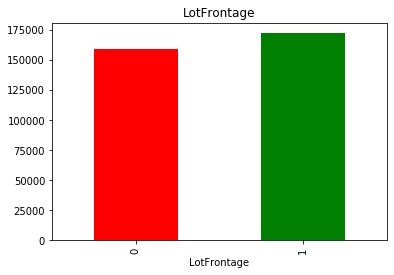

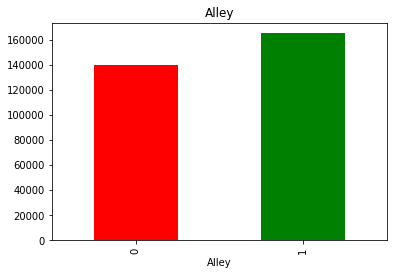

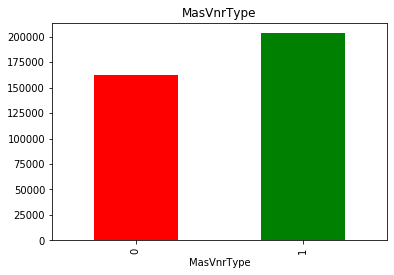

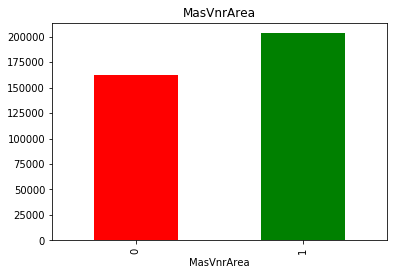

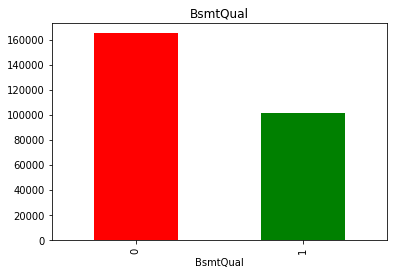

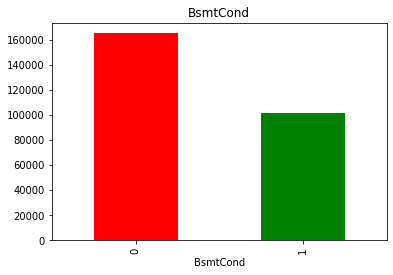

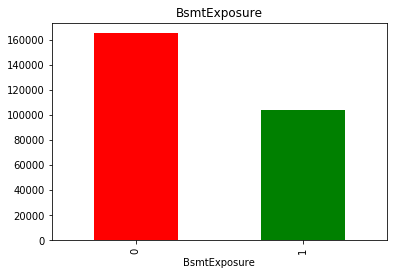

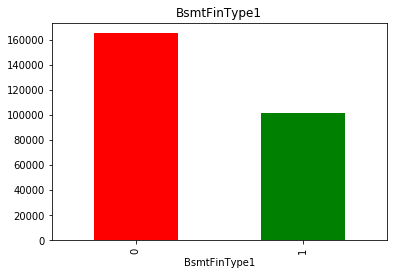

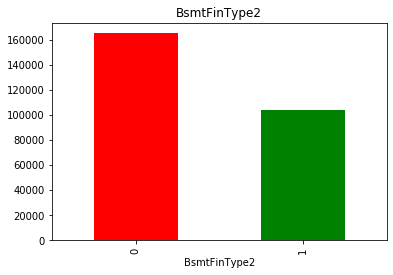

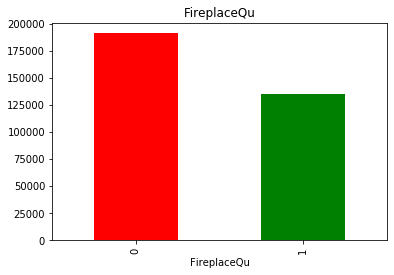

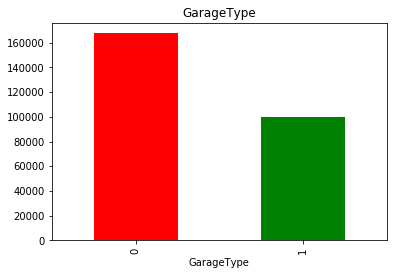

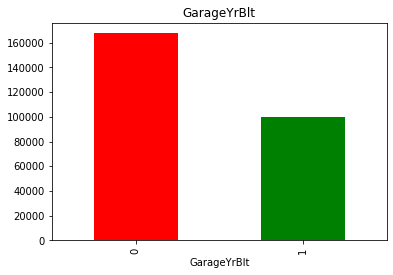

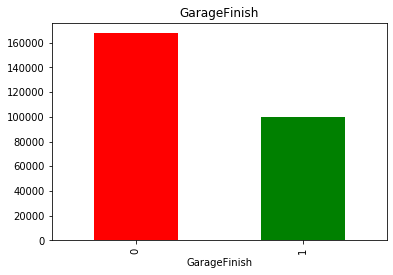

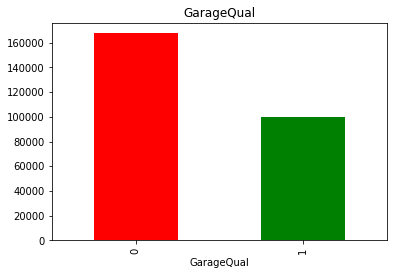

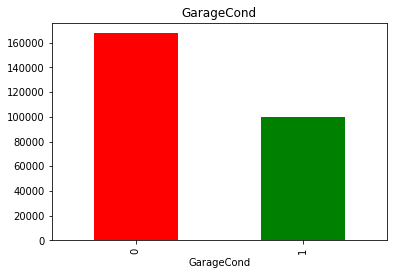

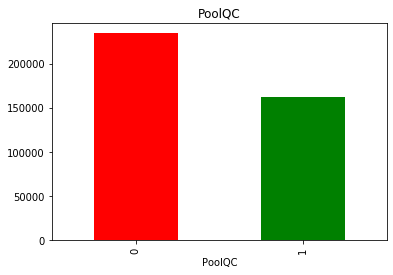

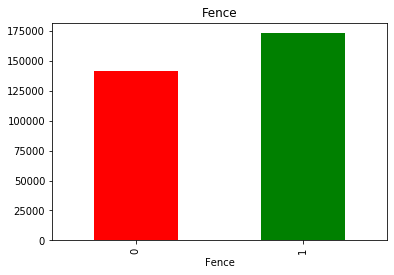

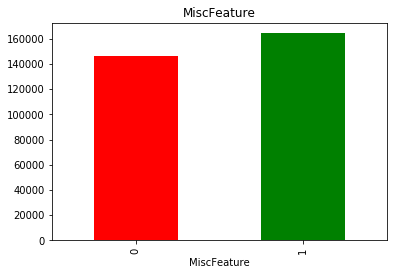

In [1055]:
for feature in feature_with_na:
    data = df_train.copy()
    
    # if the the data is not null the replace by 0 and if null then replace by 1
    data[feature] = np.where(data[feature].isnull(),1 , 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['Red','Green'])
    plt.title(feature)
    plt.show()
    

Here with the relationship between the missing values and the dependent variables is clearly visible. So we need to replace these nan values with something else which is meaningful which will be done in Feature Engineering Section! :) 

In [1056]:
# From the dataset the Id column is unneccessary so we will drop this column in Feature Engineering Section
print("Id of Houses {}".format(len(df_train.Id)))

Id of Houses 1460


# Numerical Variables 

In [1057]:
# list of numerical variables

numerical_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']
# print the numerical variables
print("Number of numerical Variables : ",len(numerical_features))

print(numerical_features)

Number of numerical Variables :  38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [1058]:
# print the numerical feature data
df_train[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Temporal Variables(Eg: DateTime Variables)

From the Dataset we have 4 year variables. We have to extract the info from the datetime variables like no of years or no of days. One example in this specific scenario can be different in years between the year the house was build and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next Section

In [1059]:
# list of variables which contain year information
year_features = [feature for feature in df_train.columns if 'Yr' in feature or 'Year' in feature]

# print the list of years 
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [1060]:
# Let's explore the content of these year variables

for feature in year_features:
    print(feature,df_train[feature].unique(),' total : ', df_train[feature].count())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]  total :  1460
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]  total :  1460
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 

Text(0.5, 1.0, 'House Price Vs Year Sold')

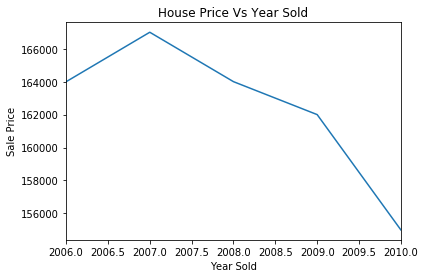

In [1061]:
# Lets analyze the Temporal Datatime Variables
## We will check whether there is relation between year the house is sold and SalePrice

df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('House Price Vs Year Sold')

In [1062]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

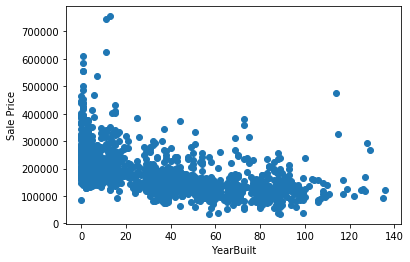

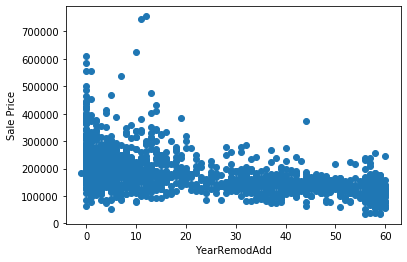

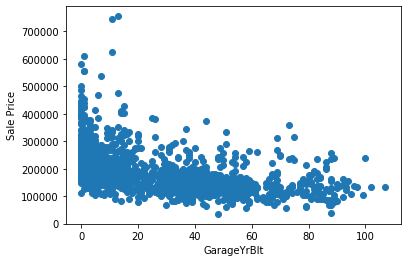

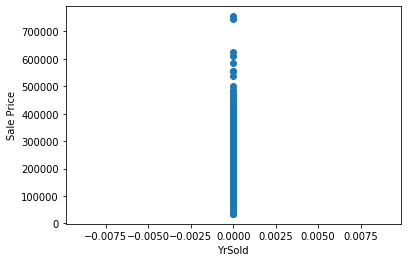

In [1063]:
# Compare the difference between All years features with SalePrice

for feature in year_features:
    data = df_train.copy()
    
    ## We will capture the difference between year variable and year house 
    data[feature] = data['YrSold']-data[feature]
    
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()
     

In [1064]:
# Numerical variables are two types 
# 1. Continuous Type
# 2. Descrete Type

# Let's deal with the discreate features
discrete_features = [feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_features+['Id']]

print('Discrete Features List :' , len(discrete_features))

Discrete Features List : 17


In [1065]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [1066]:
df_train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


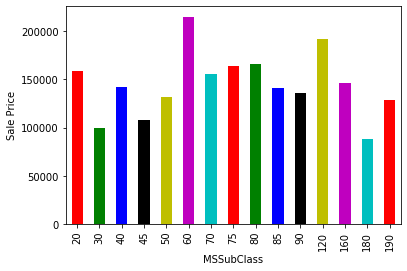

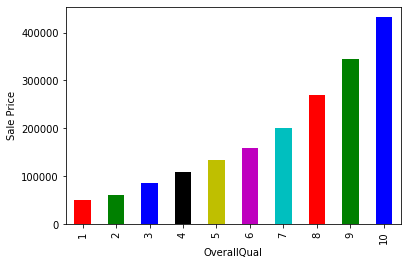

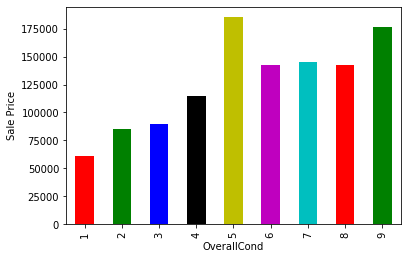

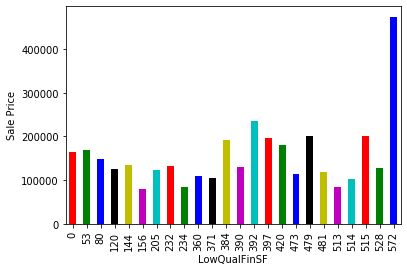

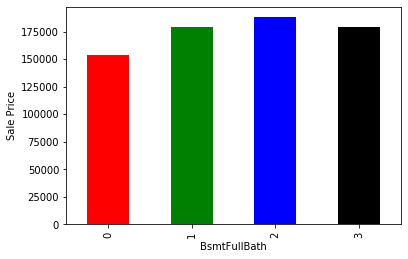

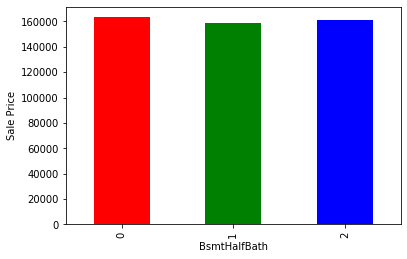

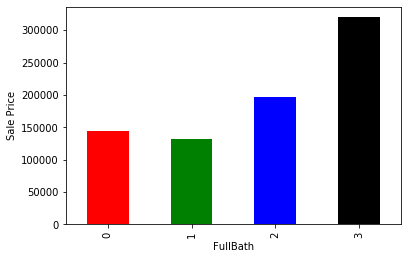

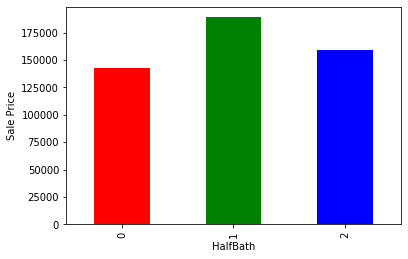

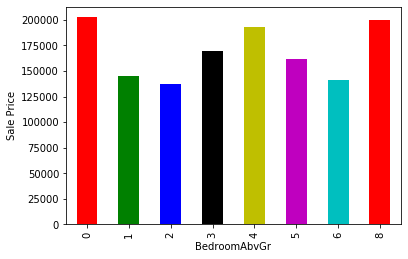

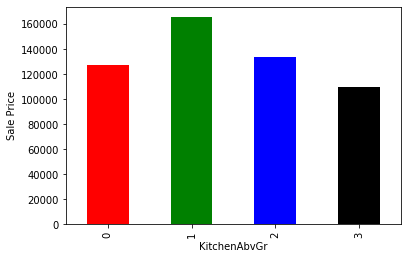

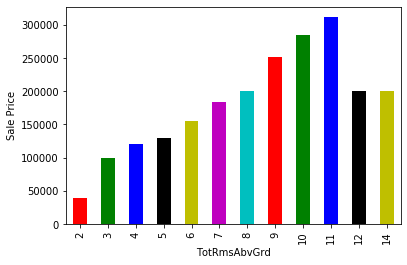

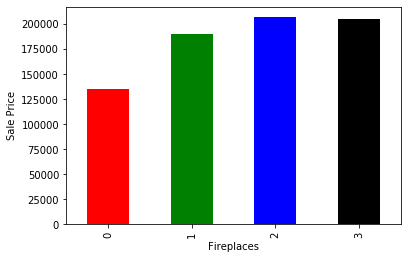

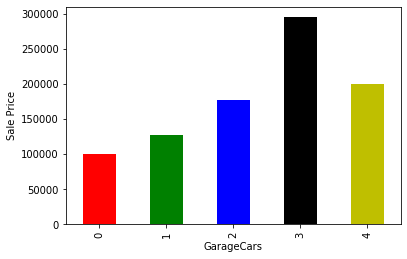

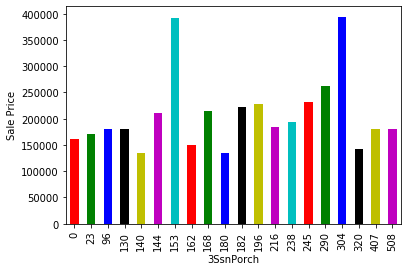

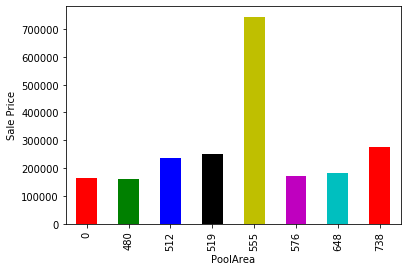

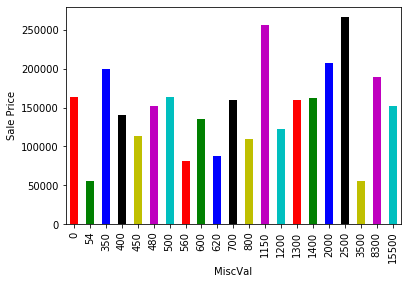

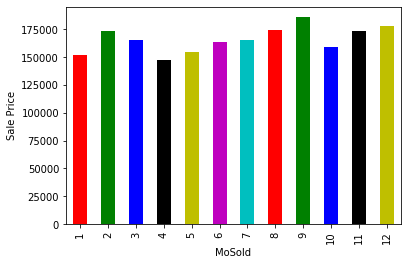

In [1067]:
# Lets find the relationship between them and PriceSale
for feature in discrete_features:
    data = df_train.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color = list('rgbkymc'))
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()
    

In [1068]:
## There is a relationship between them and SalePrice

# Continuous Variable

In [1069]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]

print('Continuous features value {}'.format(len(continuous_feature)))

Continuous features value 16


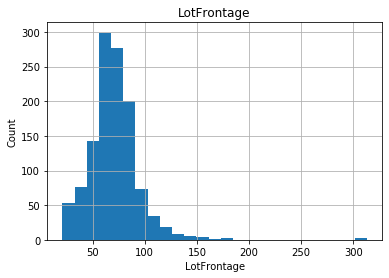

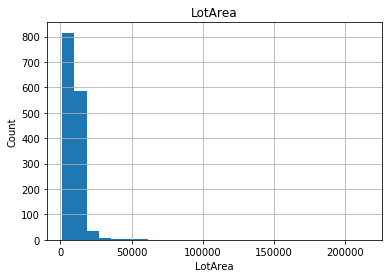

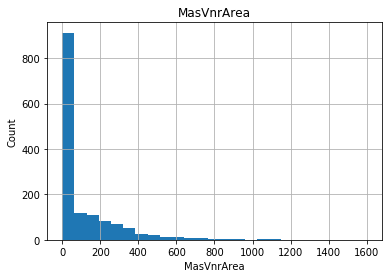

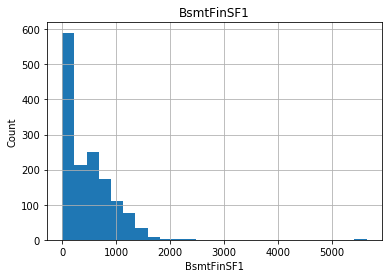

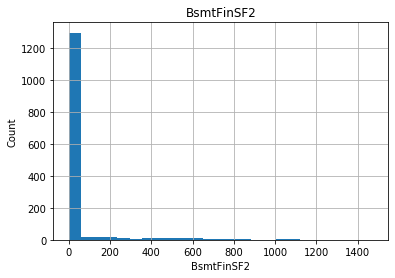

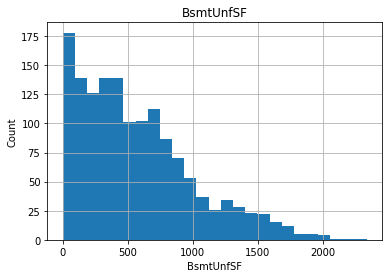

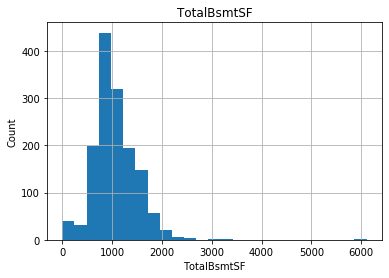

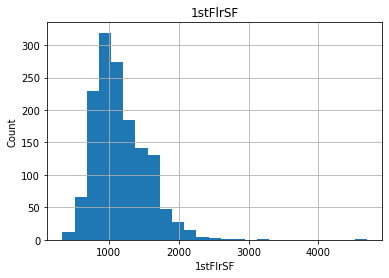

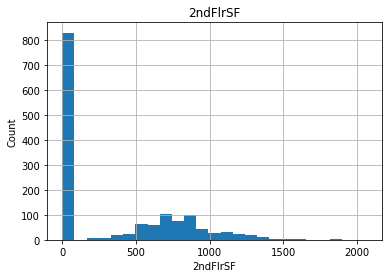

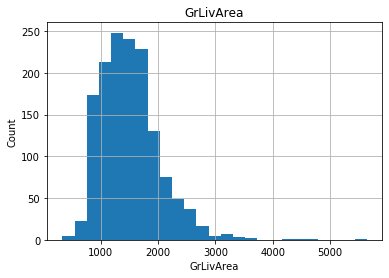

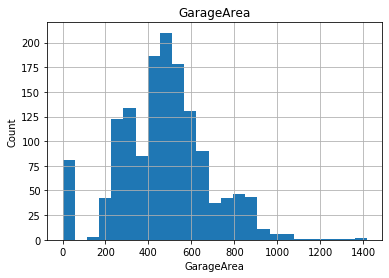

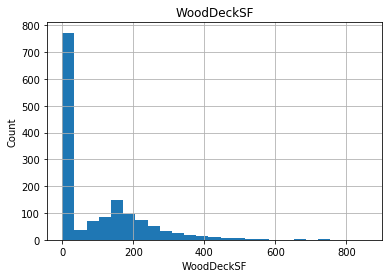

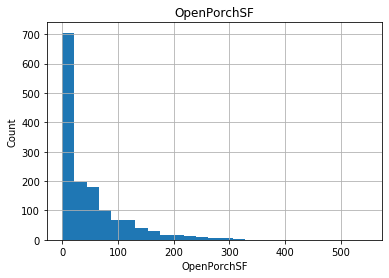

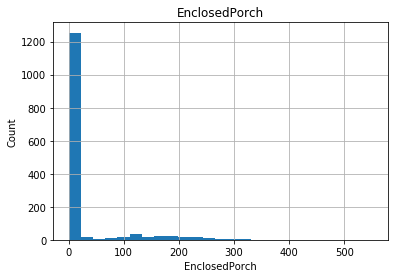

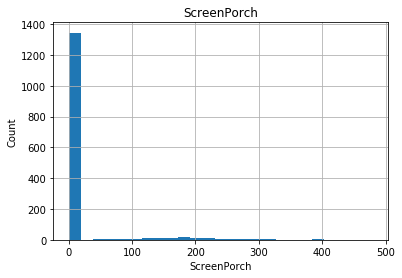

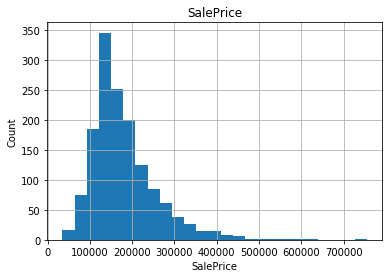

In [1070]:
# continuous value er jonno histogram use kori
# So, we need to find the relationship between the continuous values and SalePrice

for feature in continuous_feature:
    data = df_train.copy()
    
    data[feature].hist(bins=25)
    #data.groupby(feature)['SalePrice'].median().plot.hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    #plt.grid()
    plt.show()
    

In [1071]:
## There is some columns has gaussian distribution and other have non gaussian distribution
## Always try to convert them into Gaussian Distribution or Normal Distribution

# Exploratory Data Analysis Part 2

In [1072]:
df_train['WoodDeckSF'].unique()

array([  0, 298, 192,  40, 255, 235,  90, 147, 140, 160,  48, 240, 171,
       100, 406, 222, 288,  49, 203, 113, 392, 145, 196, 168, 112, 106,
       857, 115, 120,  12, 576, 301, 144, 300,  74, 127, 232, 158, 352,
       182, 180, 166, 224,  80, 367,  53, 188, 105,  24,  98, 276, 200,
       409, 239, 400, 476, 178, 574, 237, 210, 441, 116, 280, 104,  87,
       132, 238, 149, 355,  60, 139, 108, 351, 209, 216, 248, 143, 365,
       370,  58, 197, 263, 123, 138, 333, 250, 292,  95, 262,  81, 289,
       124, 172, 110, 208, 468, 256, 302, 190, 340, 233, 184, 201, 142,
       122, 155, 670, 135, 495, 536, 306,  64, 364, 353,  66, 159, 146,
       296, 125,  44, 215, 264,  88,  89,  96, 414, 519, 206, 141, 260,
       324, 156, 220,  38, 261, 126,  85, 466, 270,  78, 169, 320, 268,
        72, 349,  42,  35, 326, 382, 161, 179, 103, 253, 148, 335, 176,
       390, 328, 312, 185, 269, 195,  57, 236, 517, 304, 198, 426,  28,
       316, 322, 307, 257, 219, 416, 344, 380,  68, 114, 327, 16

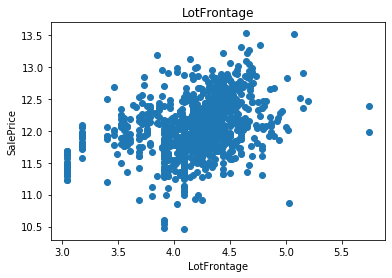

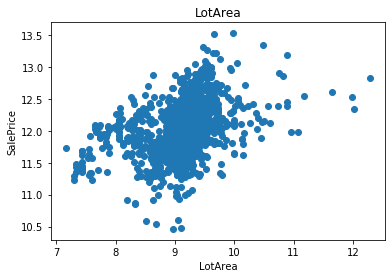

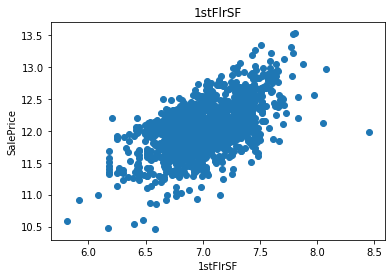

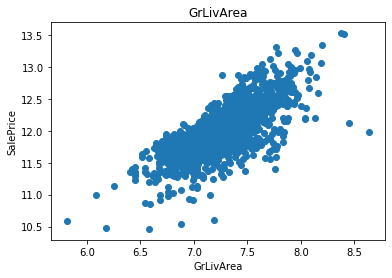

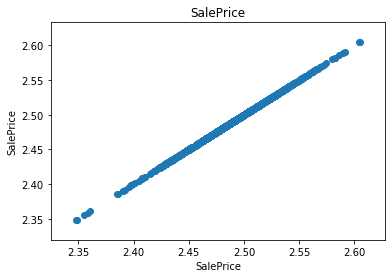

In [1073]:
## We will be using logarithmic transformation in the continuous valus



for feature in continuous_feature:
    data = df_train.copy()
    if 0 in data[feature].unique():
        ## unique() list er moddhe 0 ase ki na check korbe
        ## log2(0) == Undefined
        pass
    else:
        ## apply log normal distribution
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
        
    
    


# Outlairs

###  Continuous Variables

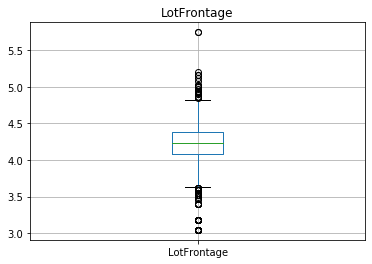

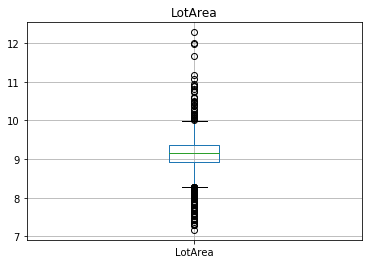

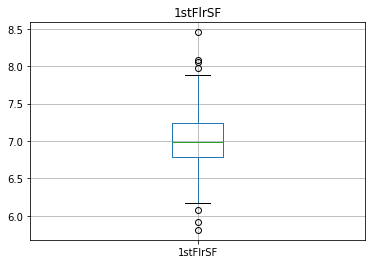

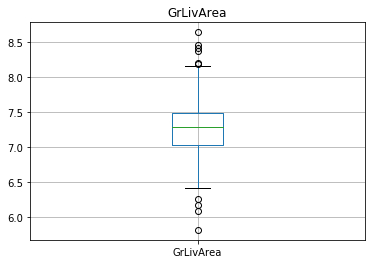

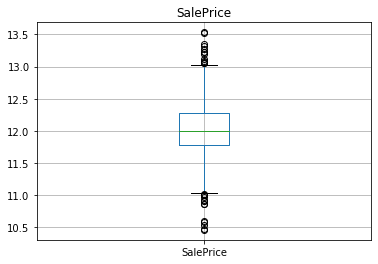

In [1074]:
# outlairs in continuous features 
# In Feature Engineering we will handle the Outlairs
# Use boxplot(only for continuous variable)
for feature in continuous_feature:
    data = df_train.copy()
    
    if 0 in data[feature].unique():
        # log2(0)==Undefined
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()
        

### Categorial Variables 

In [1075]:
# Extract the categorical features

categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype=='O']
print('Size of categorical features : ',len(categorical_features))

Size of categorical features :  43


In [1076]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1077]:
df_train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [1078]:
## First thing about the categorical feature is the Cardinality of Categoracl Feature
# Cardinality = How many differnet categories in the feature 

for feature in categorical_features:
    print('The {} feature has {} categories'.format(feature,len(df_train[feature].unique())))

The MSZoning feature has 5 categories
The Street feature has 2 categories
The Alley feature has 3 categories
The LotShape feature has 4 categories
The LandContour feature has 4 categories
The Utilities feature has 2 categories
The LotConfig feature has 5 categories
The LandSlope feature has 3 categories
The Neighborhood feature has 25 categories
The Condition1 feature has 9 categories
The Condition2 feature has 8 categories
The BldgType feature has 5 categories
The HouseStyle feature has 8 categories
The RoofStyle feature has 6 categories
The RoofMatl feature has 8 categories
The Exterior1st feature has 15 categories
The Exterior2nd feature has 16 categories
The MasVnrType feature has 5 categories
The ExterQual feature has 4 categories
The ExterCond feature has 5 categories
The Foundation feature has 6 categories
The BsmtQual feature has 5 categories
The BsmtCond feature has 5 categories
The BsmtExposure feature has 5 categories
The BsmtFinType1 feature has 7 categories
The BsmtFinType

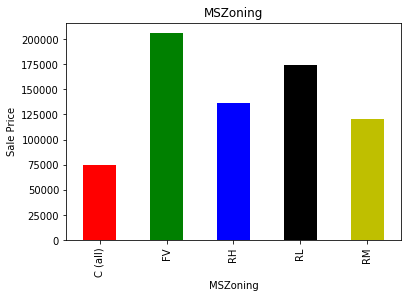

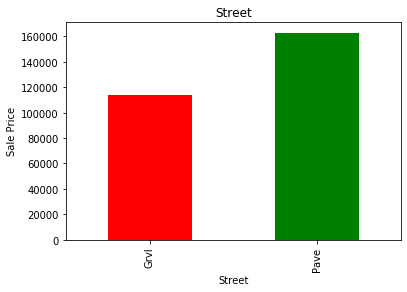

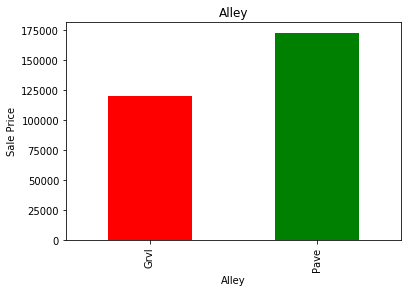

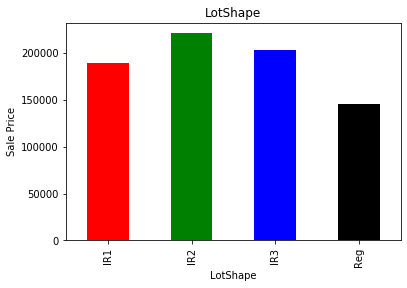

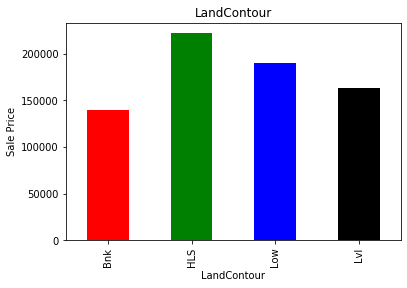

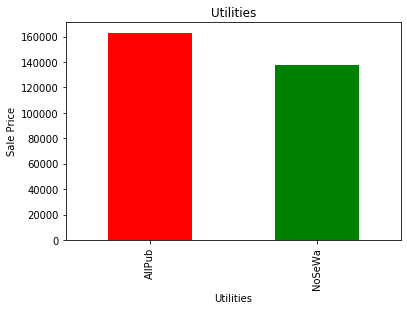

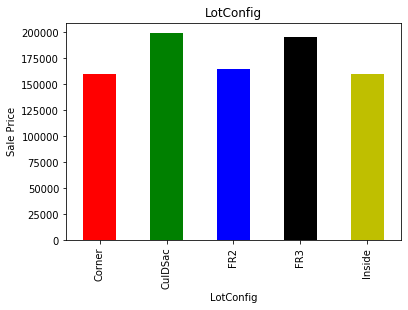

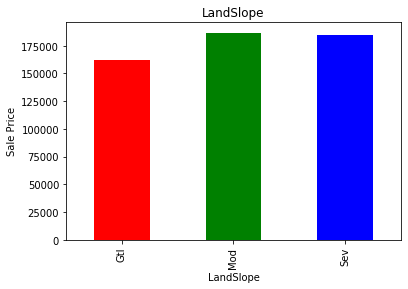

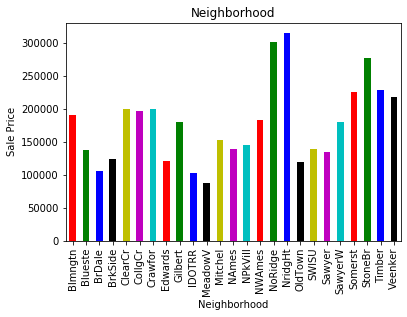

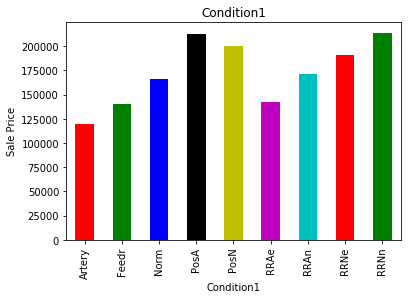

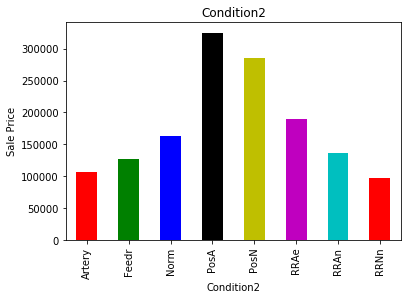

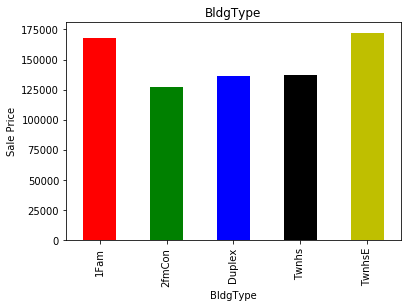

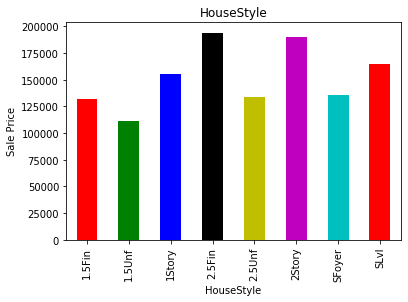

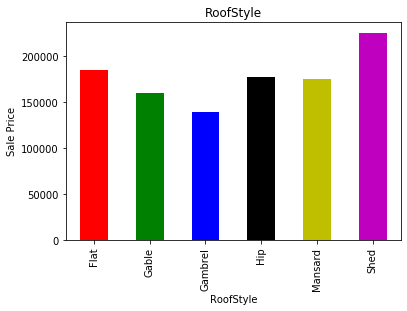

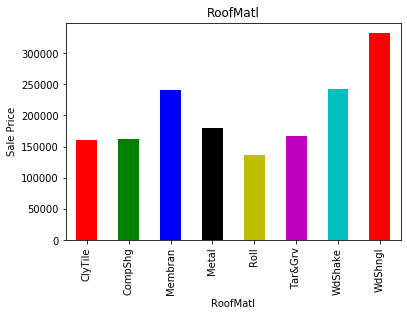

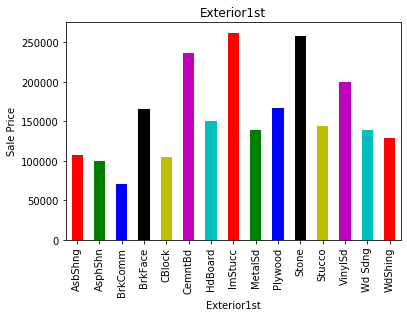

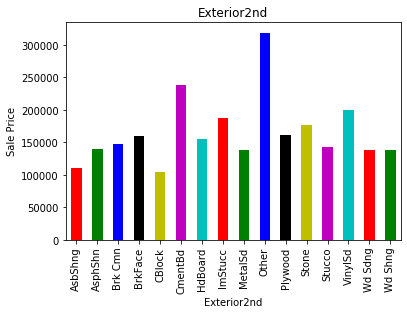

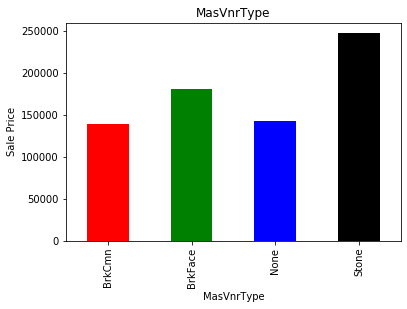

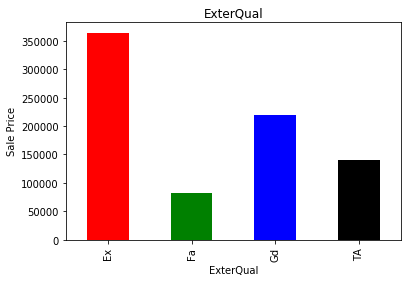

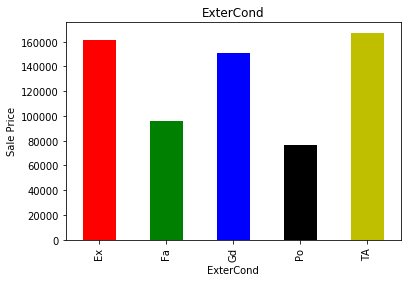

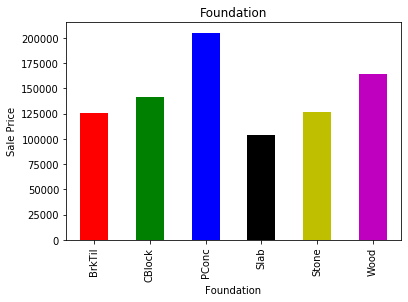

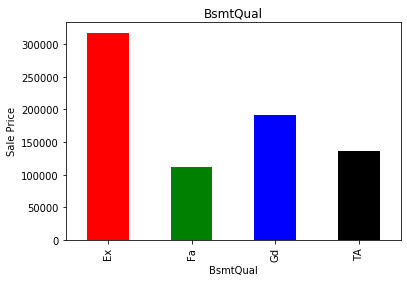

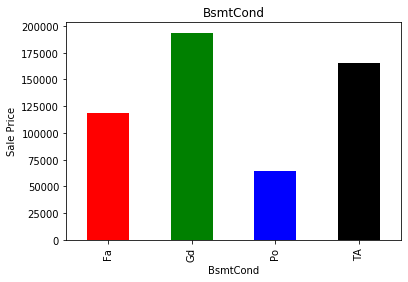

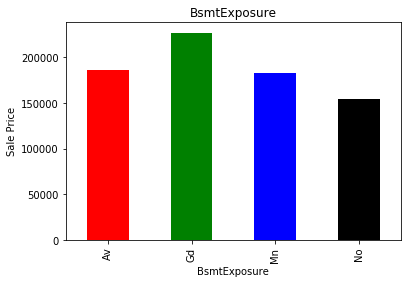

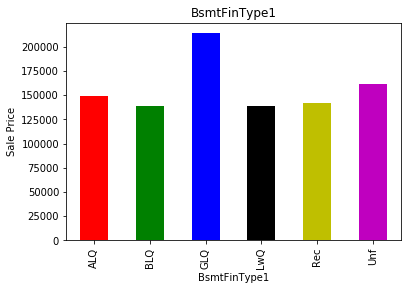

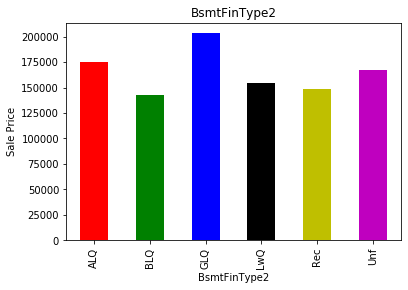

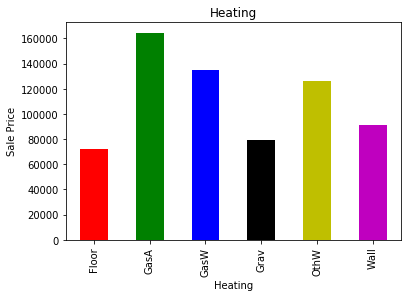

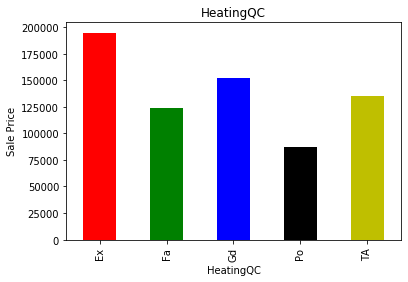

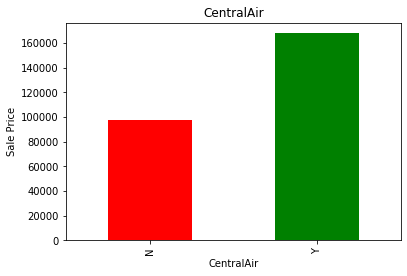

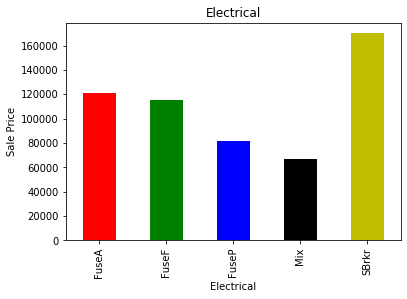

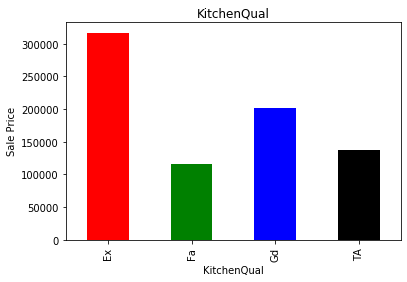

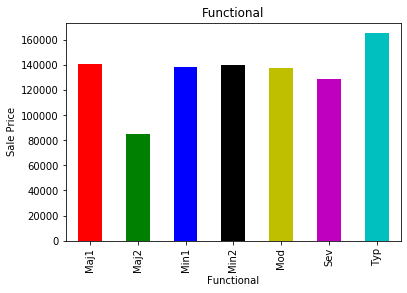

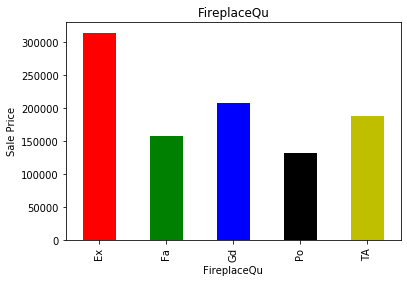

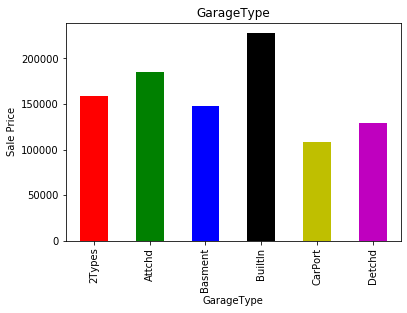

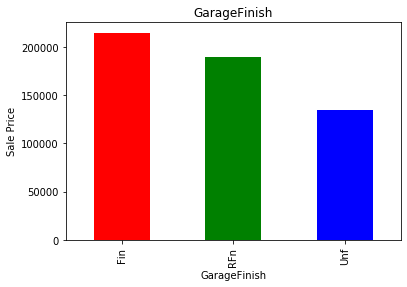

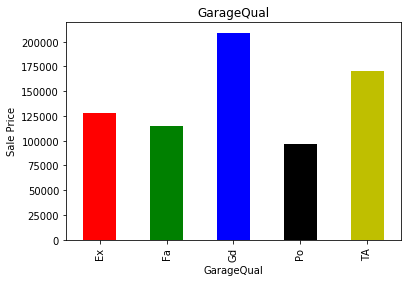

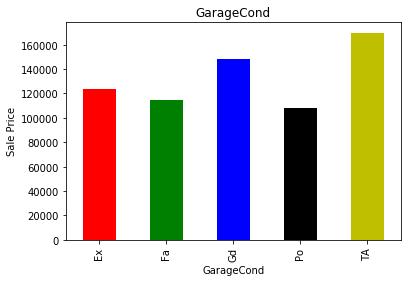

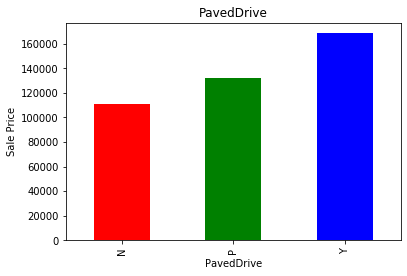

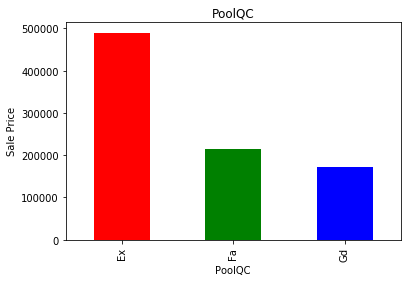

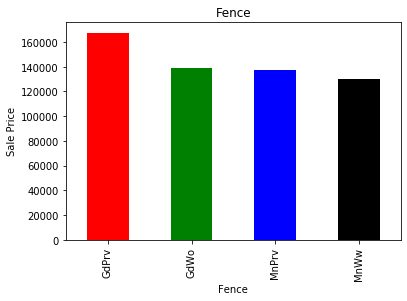

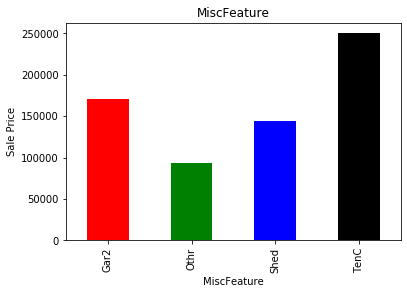

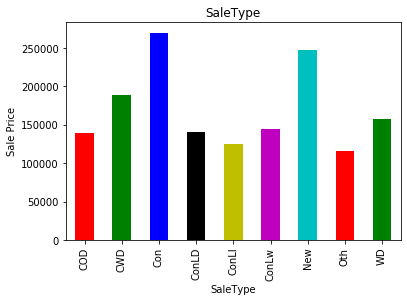

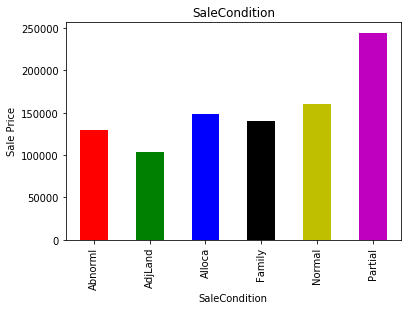

In [1079]:
'''
Condition1,Neighborhood,Condition2,Exterior1st,Exterior2nd,SaleType
These features has more then 7 categorical so we need to handle them seperately and

rest of the columns will be used OneHotEncoding Technique(pd.get_dummies())
'''

# Now find the relationship between the Categorical Features and SalePrice

# Create a bar PLot in the categorical feature with respect to the SalePrice

for feature in categorical_features:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=list('rgbkymc'))
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()




# Feature Engineering

We will be performing all the bellow steps in Feature Engineering
1. Missing Values
2. Temporal Variables
3. Categorical Variables: remove rare labels
4. Standardise the values of the variables to the same range

** You have to do the same Feature Engineering for the Test and Train Data Seperately


In [1080]:
## Always remember there is a chance of Data Lecage So we need to split the data first then
# feature Engineering

# X_train,X_test,Y_train,Y_test = train_test_split(df_train,df_train['SalePrice'],test_size=0.1 , random_state=0)
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

# Missing Values

In [1081]:
# Let us capture all the nan values 
## First lets handle the Categorical features which are missing

categorical_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtype=='O']

for feature in categorical_nan:
    print('{}: {}% missing values'.format(feature,np.around(df_train[feature].isnull().mean(),4)))


Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [1082]:
## When there is a categorical nan values replace them with new labels

def replace_categorical_nan_values(df_train,categorical_nan):
    data = df_train.copy()
    # Replace all the nan/missing values with new labels
    data[categorical_nan] = data[categorical_nan].fillna('Missing')
    return data

df_train = replace_categorical_nan_values(df_train,categorical_nan)

df_train[categorical_nan].isnull().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [1083]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


# Numerical Missing Values

In [1084]:
## Extract the numerical nan value features
numerical_with_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtype!='O']
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [1085]:
## Find the percentile of Numerical Missing Values

for feature in numerical_with_nan:
    print("{} : {}% null values".format(feature,np.around(df_train[feature].isnull().mean(),4)))

LotFrontage : 0.1774% null values
MasVnrArea : 0.0055% null values
GarageYrBlt : 0.0555% null values


In [1086]:
# Replacing numerical nan value by median

for feature in numerical_with_nan:
    
    # caculate the median of each column
    median_value = df_train[feature].median()
    
    
    # Create a seperate column and named feature+'nan' which will replace by if null 1 otherwise 0
    
    df_train[feature+'nan'] = np.where(df_train[feature].isnull(),1 ,0)
    
    # replace the nan value by median
    df_train[feature].fillna(median_value,inplace=True)
    
    
# print the numerical_with_nan feature's nan values
df_train[numerical_with_nan].isnull().sum()
    
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [1087]:
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2008,WD,Normal,118000,0,0,0


# Temporal variables (Date Time Varibles)

In [1088]:
for feature in year_features:
    if feature!='YrSold':
        # replace the year features by 'YrSold'-df_train[feature] and put it into df_train[feature]
        df_train[feature] = df_train['YrSold']-df_train[feature]
        

In [1089]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2008,WD,Normal,118000,0,0,0


In [1090]:
df_train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


# Numerical Variables

Since the numerical variables are skewed we will perform log normal distribution

In [1091]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [1092]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [1093]:
numerical_feature_with_not_zero = []
for feature in continuous_feature:
    if 0 in df_train[feature].unique():
        pass
    else:
        numerical_feature_with_not_zero.append(feature)
        # log normal distribution in a skewed dataset
        df_train[feature] = np.log(df_train[feature])

In [1094]:
numerical_feature_with_not_zero

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [1095]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


# Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observation

In [1096]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1097]:
for feature in categorical_features:
    # find the percentile of each categorical feature 
    temp = df_train.groupby(feature)['SalePrice'].count()/len(df_train)
    # if the percentile of that perticular categorical feature is greater than 1% then 
    #i will take the index of that feature
    temp_df = temp[temp>0.01].index
    
    # if there is less than 1% then i will replace by 'Rare_var' otherwise df_train[feature]
    df_train[feature] = np.where(df_train[feature].isin(temp_df),df_train[feature],'Rare_var')
    
    
    

In [1098]:
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2008,WD,Abnorml,11.774520,0,0,0
9,10,190,RL,3.912023,8.911934,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2008,WD,Normal,11.678440,0,0,0


In [1099]:
df_train['MSZoning'].value_counts()

RL          1151
RM           218
FV            65
RH            16
Rare_var      10
Name: MSZoning, dtype: int64

In [1100]:
df_train['Street'].value_counts()

Pave        1454
Rare_var       6
Name: Street, dtype: int64

In [1101]:



# for feature in categorical_features:
#     count_freq = df_train[feature].value_counts().to_dict()
    
#     count_freq_len = len(count_freq)
    
#     for key in count_freq:
#         count_freq[key] = count_freq_len
#         count_freq_len -= 1
        
#     df_train[feature] = df_train[feature].map(count_freq)
    

In [1102]:
label = LabelEncoder()

for feature in categorical_features:
    df_train[feature] = label.fit_transform(df_train[feature])

In [1103]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,...,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,...,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,...,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,...,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,...,0,0,12,2008,3,2,12.429216,0,0,0


# Feature Scalling 

In [1104]:
feature_scale = [feature for feature in df_train.columns if feature not in ['Id','SalePrice']]
scaler = MinMaxScaler()
scaler.fit(df_train[feature_scale])


MinMaxScaler()

In [1105]:
scaler.transform(df_train[feature_scale])

array([[0.23529412, 0.5       , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.5       , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [1106]:
data = pd.concat([df_train[['Id','SalePrice']].reset_index(drop=True),
                   pd.DataFrame(scaler.transform(df_train[feature_scale]),columns=feature_scale)],
                   axis=1)

In [1107]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


In [1108]:
data.to_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\Version-1\x_train.csv',index=False)

# Feature Engineering (Test Data)

1. Missing values
2. Temporal variables
3. Categorical Variables: remove rare labels
4. Standardise the values of the variables to the same range

# Missing Values

In [1109]:
categorical_features_test = [feature for feature in df_test.columns if df_test[feature].dtype=='O']
categorical_features_test

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1110]:
# First handle with the categorical missing values

categorical_nan_test = [feature for feature in df_test.columns if df_test[feature].dtype=='O' and df_test[feature].isnull().sum()>1]
print("The size of the categorical nan :",len(categorical_nan_test))

The size of the categorical nan : 18


In [1111]:
categorical_nan_test

['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1112]:
for feature in categorical_nan_test:
    print('{}: {}% missing values'.format(feature,np.around(df_test[feature].isnull().mean(),4)))

MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


In [1113]:
## When there is a categorical nan values replace them with new labels

def replace_categorical_nan_values_test(df_test,categorical_nan_test):
    data = df_test.copy()
    # Replace all the nan/missing values with new labels
    data[categorical_nan_test] = data[categorical_nan_test].fillna('Missing')
    return data

df_test = replace_categorical_nan_values_test(df_test,categorical_nan_test)

df_test[categorical_nan_test].isnull().sum()


MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [1114]:
df_test.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Missing,Reg,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Missing,Reg,Lvl,AllPub,...,0,0,Missing,MnPrv,Missing,0,4,2010,WD,Normal


# Numerical Missing Values

In [1115]:
numerical_with_nan_test = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtype!='O']
numerical_with_nan_test

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']

In [1116]:
## Find the percentile of Numerical Missing Values

for feature in numerical_with_nan_test:
    print("{} : {}% null values".format(feature,np.around(df_test[feature].isnull().mean(),4)))

LotFrontage : 0.1556% null values
MasVnrArea : 0.0103% null values
BsmtFullBath : 0.0014% null values
BsmtHalfBath : 0.0014% null values
GarageYrBlt : 0.0535% null values


In [1117]:
# Replacing numerical nan value by median

for feature in numerical_with_nan_test:
    
    # caculate the median of each column
    median_value = df_test[feature].median()
    
    
    # Create a seperate column and named feature+'nan' which will replace by if null 1 otherwise 0
    
    df_test[feature+'nan'] = np.where(df_test[feature].isnull(),1 ,0)
    
    # replace the nan value by median
    df_test[feature].fillna(median_value,inplace=True)
    
    
# print the numerical_with_nan feature's nan values
df_test[numerical_with_nan_test].isnull().sum()
    
    

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [1118]:
df_test.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,0
5,1466,60,RL,75.0,10000,Pave,Missing,IR1,Lvl,AllPub,...,0,4,2010,WD,Normal,0,0,0,0,0
6,1467,20,RL,67.0,7980,Pave,Missing,IR1,Lvl,AllPub,...,500,3,2010,WD,Normal,1,0,0,0,0
7,1468,60,RL,63.0,8402,Pave,Missing,IR1,Lvl,AllPub,...,0,5,2010,WD,Normal,0,0,0,0,0
8,1469,20,RL,85.0,10176,Pave,Missing,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,0,0,0,0,0
9,1470,20,RL,70.0,8400,Pave,Missing,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,0,0,0,0,0


# Temporal variables (Date Time Varibles)

In [1119]:
year_features_test = [feature for feature in df_test.columns if 'Yr' in feature or 'Year' in feature ]

In [1120]:
for feature in year_features_test:
    if feature!='YrSold':
        # replace the year features by 'YrSold'-df_test[feature] and put it into df_test[feature]
        df_test[feature] = df_test['YrSold']-df_test[feature]
        

In [1121]:
df_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,2010
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,2010
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,2010
5,1466,60,RL,75.0,10000,Pave,Missing,IR1,Lvl,AllPub,...,0,4,2010,WD,Normal,0,0,0,0,2010
6,1467,20,RL,67.0,7980,Pave,Missing,IR1,Lvl,AllPub,...,500,3,2010,WD,Normal,1,0,0,0,2010
7,1468,60,RL,63.0,8402,Pave,Missing,IR1,Lvl,AllPub,...,0,5,2010,WD,Normal,0,0,0,0,2010
8,1469,20,RL,85.0,10176,Pave,Missing,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,0,0,0,0,2010
9,1470,20,RL,70.0,8400,Pave,Missing,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,0,0,0,0,2010


In [1122]:
df_test[year_features_test].head(50)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBltnan
0,49,49,49.0,2010,2010
1,52,52,52.0,2010,2010
2,13,12,13.0,2010,2010
3,12,12,12.0,2010,2010
4,18,18,18.0,2010,2010
5,17,16,17.0,2010,2010
6,18,3,18.0,2010,2010
7,12,12,12.0,2010,2010
8,20,20,20.0,2010,2010
9,40,40,40.0,2010,2010


# Numerical Variables

Since the numerical variables are skewed we will perform log normal distribution

In [1123]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,2010
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,2010
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,2010


In [1124]:
numerical_features_test = [feature for feature in df_test.columns if df_test[feature].dtype!='O']
numerical_features_test

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontagenan',
 'MasVnrAreanan',
 'BsmtFullBathnan',
 'BsmtHalfBathnan',
 'GarageYrBltnan']

In [1125]:
# Numerical variables are two types 
# 1. Continuous Type
# 2. Descrete Type

# Let's deal with the discreate features
discrete_features_test = [feature for feature in numerical_features_test if len(df_test[feature].unique())<25 and feature not in year_features_test+['Id']]

print('Discrete Features List :' , len(discrete_features_test))

Discrete Features List : 20


In [1126]:


continuous_feature_test = [feature for feature in numerical_features_test if feature not in discrete_features_test+year_features_test+['Id']]

print('Continuous features value {}'.format(len(continuous_feature_test)))

Continuous features value 16


In [1127]:
numerical_feature_with_not_zero_test = []
for feature in continuous_feature_test:
    if 0 in df_test[feature].unique():
        pass
    else:
        numerical_feature_with_not_zero_test.append(feature)
        # log normal distribution in a skewed dataset
        df_test[feature] = np.log(df_test[feature])

In [1128]:
numerical_feature_with_not_zero_test

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [1129]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,2010
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,2010
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,2010


# Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observation

In [1130]:
categorical_features_test

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1131]:
df_test.groupby('MSZoning')['YrSold'].count()

MSZoning
C (all)      15
FV           74
Missing       4
RH           10
RL         1114
RM          242
Name: YrSold, dtype: int64

In [1132]:
for feature in categorical_features_test:
    # find the percentile of each categorical feature 
    temp = df_test.groupby(feature)['YrSold'].count()/len(df_test)
    # if the percentile of that perticular categorical feature is greater than 1% then 
    #i will take the index of that feature
    temp_df = temp[temp>0.01].index
    
    # if there is less than 1% then i will replace by 'Rare_var' otherwise df_train[feature]
    df_test[feature] = np.where(df_test[feature].isin(temp_df),df_test[feature],'Rare_var')
    
    
    

In [1133]:
df_test.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,Rare_var,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,2010
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,2010
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,2010
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,2010
5,1466,60,RL,4.317488,9.210340,Pave,Missing,IR1,Lvl,AllPub,...,0,4,2010,WD,Normal,0,0,0,0,2010
6,1467,20,RL,4.204693,8.984694,Pave,Missing,IR1,Lvl,AllPub,...,500,3,2010,WD,Normal,1,0,0,0,2010
7,1468,60,RL,4.143135,9.036225,Pave,Missing,IR1,Lvl,AllPub,...,0,5,2010,WD,Normal,0,0,0,0,2010
8,1469,20,RL,4.442651,9.227787,Pave,Missing,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,0,0,0,0,2010
9,1470,20,RL,4.248495,9.035987,Pave,Missing,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,0,0,0,0,2010


In [1134]:
label = LabelEncoder()

for feature in categorical_features_test:
    df_test[feature] = label.fit_transform(df_test[feature])

In [1135]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,4,4.382027,9.360655,0,1,3,3,0,...,0,6,2010,4,2,0,0,0,0,2010
1,1462,20,2,4.394449,9.565704,0,1,0,3,0,...,12500,6,2010,4,2,0,0,0,0,2010
2,1463,60,2,4.304065,9.534595,0,1,0,3,0,...,0,3,2010,4,2,0,0,0,0,2010
3,1464,60,2,4.356709,9.208138,0,1,0,3,0,...,0,6,2010,4,2,0,0,0,0,2010
4,1465,120,2,3.761200,8.518193,0,1,0,1,0,...,0,1,2010,4,2,0,0,0,0,2010


# Feature Scalling 

In [1136]:
feature_scale_test = [feature for feature in df_test.columns if feature not in ['Id']]
scaler = MinMaxScaler()
scaler.fit(df_test[feature_scale_test])


MinMaxScaler()

In [1137]:
scaler.transform(df_test[feature_scale_test])

array([[0.        , 1.        , 0.59344538, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.5       , 0.59895721, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.5       , 0.55885415, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.5       , 0.90099208, ..., 0.        , 0.        ,
        0.2       ],
       [0.38235294, 0.5       , 0.48035069, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.55885415, ..., 0.        , 0.        ,
        0.2       ]])

In [1138]:
data_test = pd.concat([df_test[['Id']].reset_index(drop=True),
                   pd.DataFrame(scaler.transform(df_test[feature_scale_test]),columns=feature_scale_test)],
                   axis=1)

In [1139]:
df_test.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,4,4.382027,9.360655,0,1,3,3,0,...,0,6,2010,4,2,0,0,0,0,2010
1,1462,20,2,4.394449,9.565704,0,1,0,3,0,...,12500,6,2010,4,2,0,0,0,0,2010
2,1463,60,2,4.304065,9.534595,0,1,0,3,0,...,0,3,2010,4,2,0,0,0,0,2010
3,1464,60,2,4.356709,9.208138,0,1,0,3,0,...,0,6,2010,4,2,0,0,0,0,2010
4,1465,120,2,3.761200,8.518193,0,1,0,1,0,...,0,1,2010,4,2,0,0,0,0,2010
5,1466,60,2,4.317488,9.210340,0,1,0,3,0,...,0,4,2010,4,2,0,0,0,0,2010
6,1467,20,2,4.204693,8.984694,0,1,0,3,0,...,500,3,2010,4,2,1,0,0,0,2010
7,1468,60,2,4.143135,9.036225,0,1,0,3,0,...,0,5,2010,4,2,0,0,0,0,2010
8,1469,20,2,4.442651,9.227787,0,1,3,3,0,...,0,2,2010,4,2,0,0,0,0,2010
9,1470,20,2,4.248495,9.035987,0,1,3,3,0,...,0,4,2010,4,2,0,0,0,0,2010


In [1140]:
data_test.to_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\Version-1\x_test.csv',index=False)

# Feature Selection 

In [1141]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

dataset = pd.read_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\Version-1\x_train.csv')
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,...,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,...,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


In [1142]:
# capture the dependent feature 
y_train = dataset[['SalePrice']]

In [1143]:
## drop dependent feature from the dataset
X_train = dataset.drop(['Id','SalePrice'],axis=1)

In [1144]:
# Apply feature selection
# First I specify the Lasso Regression and I,
# select a suitable alpha(equivalent to panelty)
# The bigger the alpha the less features that will be selected

#Then I use the SelcetFromModel object from sklearm,which
# will select the feratures which coefficents are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0)) # remember to set the seed, the 
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [1145]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [1146]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
# print the number of total and selected features 

# this is how we can make a list of the selected features 

selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 20
features with coefficients shrank to zero: 62


In [1147]:
selected_feat

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [1148]:
X_train = X_train[selected_feat]

In [1149]:
X_train

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,0.5,1.0,0.0,0.666667,0.098361,0.333333,0.5,1.00,0.333333,0.0,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.0,0.666667,0.50,1.0
1,0.5,1.0,0.0,0.555556,0.524590,1.000000,0.5,0.25,0.000000,0.0,1.0,0.503056,0.470245,0.000000,1.000000,0.333333,0.0,0.666667,0.50,1.0
2,0.5,0.0,0.0,0.666667,0.114754,0.333333,0.5,0.75,0.333333,0.0,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.0,0.666667,0.50,1.0
3,0.5,0.0,0.0,0.666667,0.606557,1.000000,1.0,1.00,0.000000,0.5,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.6,1.000000,0.75,1.0
4,0.5,0.0,0.0,0.777778,0.147541,0.333333,0.5,0.00,0.333333,0.0,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.0,0.666667,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.5,1.0,0.0,0.555556,0.131148,1.000000,0.5,1.00,1.000000,0.0,1.0,0.396777,0.564433,0.000000,1.000000,0.333333,0.0,0.666667,0.50,1.0
1456,0.5,1.0,0.0,0.555556,0.377049,1.000000,0.5,1.00,0.000000,1.0,1.0,0.690872,0.645810,0.333333,1.000000,0.666667,0.0,1.000000,0.50,1.0
1457,0.5,1.0,0.0,0.666667,0.081967,0.000000,1.0,1.00,0.333333,0.0,1.0,0.480189,0.688669,0.000000,0.666667,0.666667,0.0,0.666667,0.25,1.0
1458,0.5,1.0,0.0,0.444444,0.245902,1.000000,1.0,0.75,0.333333,0.5,1.0,0.443419,0.414497,0.333333,0.666667,0.000000,0.0,1.000000,0.25,1.0


In [1150]:
data_test = pd.read_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\Version-1\x_test.csv')

In [1151]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,0.000000,1.0,0.593445,0.566360,0.0,0.5,1.0,1.000000,0.0,...,0.000000,0.454545,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0
1,1462,0.000000,0.5,0.598957,0.622527,0.0,0.5,0.0,1.000000,0.0,...,0.735294,0.454545,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0
2,1463,0.235294,0.5,0.558854,0.614005,0.0,0.5,0.0,1.000000,0.0,...,0.000000,0.181818,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0
3,1464,0.235294,0.5,0.582212,0.524583,0.0,0.5,0.0,1.000000,0.0,...,0.000000,0.454545,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0
4,1465,0.588235,0.5,0.317987,0.335596,0.0,0.5,0.0,0.333333,0.0,...,0.000000,0.000000,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0


In [1152]:
X_test = data_test[selected_feat]

In [1153]:
X_test

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,1.00,1.0,0.00,0.444444,0.822581,1.000000,1.0,1.0,0.833333,1.0,1.0,0.312253,0.312253,0.000000,1.0,0.00,0.166667,1.000000,0.2,1.0
1,0.50,0.0,0.00,0.555556,0.870968,1.000000,1.0,1.0,0.000000,1.0,1.0,0.468253,0.468253,0.000000,0.5,0.00,0.166667,1.000000,0.2,1.0
2,0.50,0.0,0.00,0.444444,0.225806,1.000000,0.5,1.0,0.333333,0.5,1.0,0.326139,0.548792,0.000000,1.0,0.25,0.166667,0.000000,0.4,1.0
3,0.50,0.0,0.00,0.555556,0.225806,1.000000,1.0,1.0,0.333333,0.0,1.0,0.325285,0.542672,0.000000,0.5,0.25,0.166667,0.000000,0.4,1.0
4,0.50,0.0,1.00,0.777778,0.322581,0.666667,0.5,1.0,0.000000,0.0,1.0,0.453388,0.453388,0.000000,0.5,0.00,0.166667,0.666667,0.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.75,1.0,0.75,0.333333,0.612903,1.000000,1.0,1.0,1.000000,0.5,1.0,0.116257,0.390532,0.000000,1.0,0.00,0.833333,0.333333,0.0,1.0
1455,0.75,1.0,1.00,0.333333,0.612903,1.000000,1.0,1.0,0.833333,1.0,1.0,0.116257,0.390532,0.000000,1.0,0.00,1.000000,1.000000,0.2,1.0
1456,0.50,1.0,0.00,0.444444,0.193548,1.000000,1.0,1.0,0.000000,0.0,1.0,0.435686,0.435686,0.333333,1.0,0.25,0.666667,1.000000,0.4,1.0
1457,0.50,1.0,0.00,0.444444,0.258065,1.000000,0.5,0.0,0.333333,1.0,1.0,0.343654,0.343654,0.000000,1.0,0.00,0.833333,0.333333,0.0,1.0


In [1154]:
X_test.isnull().sum()

MSZoning        0
LotShape        0
BldgType        0
OverallQual     0
YearRemodAdd    0
ExterQual       0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
CentralAir      0
1stFlrSF        0
GrLivArea       0
BsmtFullBath    0
KitchenQual     0
Fireplaces      0
GarageType      0
GarageFinish    0
GarageCars      1
PavedDrive      0
dtype: int64

In [1155]:
X_test['GarageCars']= X_test['GarageCars'].fillna(X_test['GarageCars'].median())

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1156]:
X_test.isnull().sum()

MSZoning        0
LotShape        0
BldgType        0
OverallQual     0
YearRemodAdd    0
ExterQual       0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
CentralAir      0
1stFlrSF        0
GrLivArea       0
BsmtFullBath    0
KitchenQual     0
Fireplaces      0
GarageType      0
GarageFinish    0
GarageCars      0
PavedDrive      0
dtype: int64

In [1157]:
X_test.dtypes

MSZoning        float64
LotShape        float64
BldgType        float64
OverallQual     float64
YearRemodAdd    float64
ExterQual       float64
BsmtQual        float64
BsmtExposure    float64
BsmtFinType1    float64
HeatingQC       float64
CentralAir      float64
1stFlrSF        float64
GrLivArea       float64
BsmtFullBath    float64
KitchenQual     float64
Fireplaces      float64
GarageType      float64
GarageFinish    float64
GarageCars      float64
PavedDrive      float64
dtype: object

# Apply Model

In [1158]:
models = [LinearRegression() , DecisionTreeRegressor() , KNeighborsRegressor() , xgb.XGBRegressor()]
i=0
for model in models:
    model_name = model
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_test)
    print(model_name," " , model_name.score(X_test,y_pred))
   # rmse = np.sqrt(mean_squared_error(y_pred))
    #print("RMSE: %f" % (rmse))
    y_pred = np.exp(y_pred)
    print(y_pred)
    output = pd.DataFrame(y_pred,columns=['SalePrice'])
    output['Id'] = df_test.Id
    columns_titles = ["Id","SalePrice"]
    output=output.reindex(columns=columns_titles)

    output.to_csv(r'F:\Machine Learning\Kaggle\House Prices Advanced Regressoin\Version-1\Output Files\my_submission'+str(i)+'.csv',index=False)
    
    i+=1
    #print(f1_score(y_pred,model_name.predict(X_test),average=None))

LinearRegression()   1.0
[[ 86459.96293681]
 [142732.04630205]
 [157714.32428668]
 ...
 [144711.99296048]
 [107859.42833607]
 [215306.23166342]]
DecisionTreeRegressor()   1.0
[ 79500. 148000. 180000. ... 135000. 118500. 228500.]
KNeighborsRegressor()   1.0
[[ 90699.60105763]
 [134940.71152976]
 [173318.49149071]
 ...
 [141016.43625869]
 [122093.62140162]
 [186558.15777294]]
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='au